In [2]:
import torch
from torch.autograd import Variable
import pennylane as qml
from pennylane import numpy as np

In [3]:
dev = qml.device("default.qubit", wires=6)
@qml.qnode(dev, interface="torch") 
def circuit(p1, p2):
    # We use the general Rot(phi,theta,omega,wires) single-qubit operation
    qml.Rot(p1[0], p1[1], p1[2], wires=1)
    qml.Rot(p2[0], p2[1], p2[2], wires=2)
    return [qml.expval(qml.PauliZ(i)) for i in range(6)]


In [4]:
def cost(var1, var2):
    # the circuit function returns a numpy array of Pauli-Z expectation values
    spins = circuit(var1, var2)

    # the expectation value of Pauli-Z is +1 for spin up and -1 for spin down
    energy = -(1 * spins[0] * spins[1]) - (-1 * spins[1] * spins[2])
    return energy


In [5]:
test1 = torch.tensor([0, np.pi, 0])
test2 = torch.tensor([0, np.pi, 0])

cost_check = cost(test1, test2)
print("Energy for [1, -1, -1] spin configuration:", cost_check)

Energy for [1, -1, -1] spin configuration: tensor(2.0000, dtype=torch.float64)


In [6]:


###############################################################################
# Random initialization
# ^^^^^^^^^^^^^^^^^^^^^

torch.manual_seed(56)
p1 = Variable((np.pi * torch.rand(6, dtype=torch.float64)), requires_grad=True)
p2 = Variable((np.pi * torch.rand(6, dtype=torch.float64)), requires_grad=True)

var_init = [p1, p2]
cost_init = cost(p1, p2)

print("Randomly initialized angles:")
print(p1)
print(p2)
print("Corresponding cost before optimization:")
print(cost_init)

Randomly initialized angles:
tensor([1.9632, 2.6022, 2.3277, 0.6521, 2.8474, 2.4300], dtype=torch.float64,
       requires_grad=True)
tensor([1.8720, 0.7414, 2.2409, 0.3661, 2.8941, 1.6173], dtype=torch.float64,
       requires_grad=True)
Corresponding cost before optimization:
tensor(0.2252, dtype=torch.float64, grad_fn=<SubBackward0>)


In [7]:
opt = torch.optim.SGD(var_init, lr=0.1)

def closure():
    opt.zero_grad()
    loss = cost(p1, p2)
    loss.backward()
    return loss

var_pt = [var_init]
cost_pt = [cost_init]
x = [0]

for i in range(100):
    opt.step(closure)
    if (i + 1) % 5 == 0:
        x.append(i)
        p1n, p2n = opt.param_groups[0]["params"]
        costn = cost(p1n, p2n)
        var_pt.append([p1n, p2n])
        cost_pt.append(costn)

        # for clarity, the angles are printed as numpy arrays
        print("Energy after step {:5d}: {: .7f} | Angles: {}".format(
            i+1, costn, [p1n.detach().numpy(), p2n.detach().numpy()]),"\n"
        )

Energy after step     5:  0.0982765 | Angles: [array([1.96323939, 2.55012328, 2.32767565, 0.65212549, 2.84741766,
       2.4299563 ]), array([1.87199129, 0.49152944, 2.24092956, 0.36608333, 2.89414643,
       1.61726366])] 

Energy after step    10:  0.0424750 | Angles: [array([1.96323939, 2.52533917, 2.32767565, 0.65212549, 2.84741766,
       2.4299563 ]), array([1.87199129, 0.32405995, 2.24092956, 0.36608333, 2.89414643,
       1.61726366])] 

Energy after step    15:  0.0183428 | Angles: [array([1.96323939, 2.51417993, 2.32767565, 0.65212549, 2.84741766,
       2.4299563 ]), array([1.87199129, 0.21327986, 2.24092956, 0.36608333, 2.89414643,
       1.61726366])] 

Energy after step    20:  0.0079246 | Angles: [array([1.96323939, 2.50927098, 2.32767565, 0.65212549, 2.84741766,
       2.4299563 ]), array([1.87199129, 0.14028602, 2.24092956, 0.36608333, 2.89414643,
       1.61726366])] 

Energy after step    25:  0.0034247 | Angles: [array([1.96323939, 2.50713286, 2.32767565, 0.65212549

In [8]:
p1_final, p2_final = opt.param_groups[0]["params"]
print("Optimized angles:")
print(p1_final)
print(p2_final)
print("Final cost after optimization:")
print(cost(p1_final, p2_final))

Optimized angles:
tensor([1.9632, 2.5055, 2.3277, 0.6521, 2.8474, 2.4300], dtype=torch.float64,
       requires_grad=True)
tensor([1.8720e+00, 1.7118e-04, 2.2409e+00, 3.6608e-01, 2.8941e+00, 1.6173e+00],
       dtype=torch.float64, requires_grad=True)
Final cost after optimization:
tensor(1.1786e-08, dtype=torch.float64, grad_fn=<SubBackward0>)


In [9]:
import matplotlib

import matplotlib.pyplot as plt

In [10]:
fig = plt.figure(figsize=(6, 4))
plt.plot(x, cost_pt, label = 'global minimum')
plt.xlabel("Optimization steps")
plt.ylabel("Cost / Energy")
plt.legend()
plt.show()

In [ ]:
torch.manual_seed(9)
p3 = Variable((np.pi*torch.rand(6, dtype = torch.float64)), requires_grad = True)
p4 = Variable((np.pi*torch.rand(6, dtype = torch.float64)), requires_grad = True)

var_init_loc = [p3, p4]
cost_init_loc = cost(p3, p4)

print("Corresponding cost before optimization:")
print(cost_init_loc)

Error: Session cannot generate requests

In [ ]:
opt = torch.optim.SGD(var_init_loc, lr = 0.1)

def closure():
    opt.zero_grad()
    loss = cost(p3, p4)
    loss.backward()
    return loss

var_pt_loc = [var_init_loc]
cost_pt_loc = [cost_init_loc]

for j in range(100):
    opt.step(closure)
    if (j + 1) % 5 == 0:
        p3n, p4n = opt.param_groups[0]['params']
        costn = cost(p3n, p4n)
        var_pt_loc.append([p3n, p4n])
        cost_pt_loc.append(costn)

        # for clarity, the angles are printed as numpy arrays
        print('Energy after step {:5d}: {: .7f} | Angles: {}'.format(
            j+1, costn, [p3n.detach().numpy(), p4n.detach().numpy()]),"\n"
        )

Energy after step     5:  0.0215115 | Angles: [array([0.77369911, 2.6256898 , 1.07981163, 0.26038622, 0.13671156,
       1.91060734]), array([0.32912747, 0.22285797, 0.48434304, 1.82595769, 1.75290459,
       0.90792544])] 

Energy after step    10:  0.0087172 | Angles: [array([0.77369911, 2.62128106, 1.07981163, 0.26038622, 0.13671156,
       1.91060734]), array([0.32912747, 0.14187011, 0.48434304, 1.82595769, 1.75290459,
       0.90792544])] 

Energy after step    15:  0.0035267 | Angles: [array([0.77369911, 2.61948157, 1.07981163, 0.26038622, 0.13671156,
       1.91060734]), array([0.32912747, 0.09023972, 0.48434304, 1.82595769, 1.75290459,
       0.90792544])] 

Energy after step    20:  0.0014259 | Angles: [array([0.77369911, 2.6187514 , 1.07981163, 0.26038622, 0.13671156,
       1.91060734]), array([0.32912747, 0.05738019, 0.48434304, 1.82595769, 1.75290459,
       0.90792544])] 

Energy after step    25:  0.0005764 | Angles: [array([0.77369911, 2.61845583, 1.07981163, 0.26038622

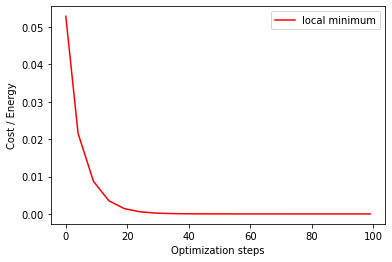

In [ ]:
fig = plt.figure(figsize=(6, 4))
plt.plot(x, cost_pt_loc, 'r', label = 'local minimum')
plt.xlabel("Optimization steps")
plt.ylabel("Cost / Energy")
plt.legend()
plt.show()